In [2]:
%load_ext autoreload
%autoreload 2
from imports.networks import *
from imports.data import Data
from imports.params import p
import matplotlib.pyplot as plt

In [4]:
data = Data(p)

91988
mass:  92000
nonzero:  496992


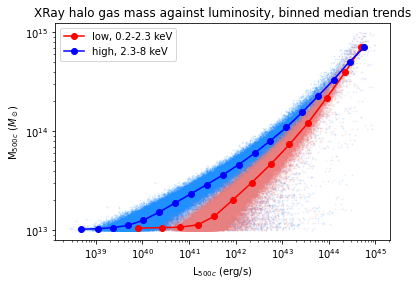

In [5]:
mass = data.soap_file[f"{p['selection_type']}/TotalMass"][:]

luminosity = data.soap_file[f"{p['selection_type']}/XRayLuminosity"][:]
luminosity_selection_low = luminosity[:,0] < 1e45
luminosity_selection_high = luminosity[:,1] < 1e45
mass_selection = np.logical_and(mass > 1e13, mass < 1e15)
nonzero = (np.sum(luminosity[:,:2] == 0, axis=1) == 0)

selection = mass_selection*nonzero*luminosity_selection_low*luminosity_selection_high

mass = mass[selection]
luminosity = luminosity[selection]
print(len(mass))
print("mass: ", np.sum(mass_selection))
# print("luminosity_low: ", np.sum(luminosity_selection_low))
# print("luminosity_high: ", np.sum(luminosity_selection_high))
print("nonzero: ", np.sum(nonzero))


plt.scatter(luminosity[:, 1], mass, s=1, c="dodgerblue", alpha=0.1)
plt.scatter(luminosity[:, 0], mass, s=1, c="lightcoral", alpha=0.1)

bins = np.logspace(np.log10(np.min(luminosity[:,0])), np.log10(np.max(luminosity[:,0])), 14)

luminosities_low = []
masses_low = []
for i in range(len(bins[:-1])):
    indices = np.logical_and(luminosity[:,0] > bins[i], luminosity[:,0] < bins[i+1])
    luminosities_low.append(np.mean(luminosity[indices,0]))
    masses_low.append(np.median(mass[indices]))


bins = np.logspace(np.log10(np.min(luminosity[:,1])), np.log10(np.max(luminosity[:,1])), 20)

luminosities_high = []
masses_high = []
for i in range(len(bins[:-1])):
    indices = np.logical_and(luminosity[:,1] > bins[i], luminosity[:,1] < bins[i+1])
    luminosities_high.append(np.mean(luminosity[indices,1]))
    masses_high.append(np.median(mass[indices]))



plt.plot(luminosities_low, masses_low, c="red", marker="o", label="low, 0.2-2.3 keV")
plt.plot(luminosities_high, masses_high, c="blue", marker="o", label="high, 2.3-8 keV")

plt.xscale("log")
plt.yscale("log")
plt.ylabel("M$_{500c}$ $(M_\odot)$")
plt.xlabel("L$_{500c}$ (erg/s)")
plt.title("XRay halo gas mass against luminosity, binned median trends")
plt.legend()
plt.show()

In [7]:
from scipy.interpolate import CubicSpline
spl_low = CubicSpline(np.log10(luminosities_low), np.log10(masses_low))
spl_high = CubicSpline(np.log10(luminosities_high), np.log10(masses_high))



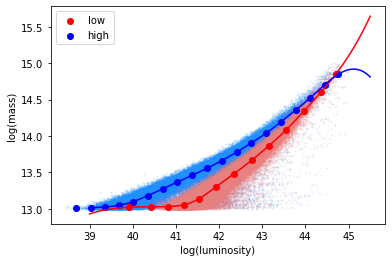

In [20]:
plt.scatter(np.log10(luminosity[:, 1]), np.log10(mass), s=1, c="dodgerblue", alpha=0.1)
plt.scatter(np.log10(luminosity[:, 0]), np.log10(mass), s=1, c="lightcoral", alpha=0.1)


x = np.linspace(39, 45, 100)

plt.plot(x, spl_low(x), c="red")
plt.plot(x, spl_high(x), c="blue")
plt.scatter(np.log10(luminosities_low), np.log10(masses_low), c="red", label="low")
plt.scatter(np.log10(luminosities_high), np.log10(masses_high), c="blue", label="high")
plt.xlabel("log(luminosity)")
plt.ylabel("log(mass)")
plt.legend()
plt.show()

In [18]:
np.save(f"{p['base_model_path']}/spline_fit_low_M13-15_L45", spl_low, allow_pickle=True)
np.save(f"{p['base_model_path']}/spline_fit_high_M13-15_L45", spl_high, allow_pickle=True)


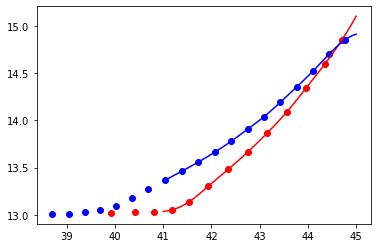

In [49]:
x = np.linspace(41, 45, 100)
plt.plot(x, np.load(f"{p['base_model_path']}/spline_fit_low_M13-15_L45.npy", allow_pickle=True)[()](x), c="red")
plt.plot(x, np.load(f"{p['base_model_path']}/spline_fit_high_M13-15_L45.npy", allow_pickle=True)[()](x), c="blue")
plt.scatter(np.log10(luminosities_low), np.log10(masses_low), c="red")
plt.scatter(np.log10(luminosities_high), np.log10(masses_high), c="blue")
plt.show()

In [345]:
# def predict_mass(l, band="low"):
#     poly = np.poly1d(np.load(f"/home/tol/Documents/Thesis/models/linear_fit_{band}_6.npy"))
#     return 10**poly(np.log10(l))

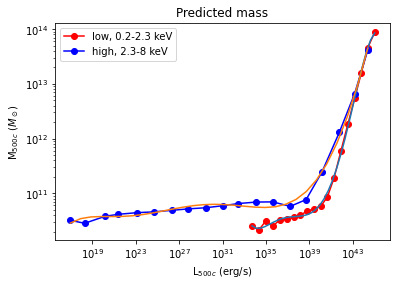

In [353]:
plt.plot(luminosities_low, gasmasses_low, c="red", marker="o", label="low, 0.2-2.3 keV")
plt.plot(luminosities_high, gasmasses_high, c="blue", marker="o", label="high, 2.3-8 keV")

testluminosities = np.logspace(np.log10(luminosities_low[0]), np.log10(luminosities_low[-1]), 30)
plt.plot(testluminosities, predict_mass(testluminosities, band="low"))

testluminosities = np.logspace(np.log10(luminosities_high[0]), np.log10(luminosities_high[-1]), 30)
plt.plot(testluminosities, predict_mass(testluminosities, band="high"))


plt.xscale("log")
plt.yscale("log")
plt.ylabel("M$_{500c}$ $(M_\odot)$")
plt.xlabel("L$_{500c}$ (erg/s)")
plt.title("Predicted mass")
plt.legend()
plt.show()